In [1]:
# # Data Preparation and Preprocessing

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf

In [11]:
## Load the Data

In [12]:
# Load the data
file_path = "train.csv"
file_path = "train.csv"
data = pd.read_csv(file_path)

print(data.head())
print(data.info())


   Unnamed: 0  hba1c_next_value  race_white  race_aian  race_black  \
0           1               7.0           0          0           0   
1           2               6.2           0          0           1   
2           3               6.2           0          0           1   
3           4               5.7           1          0           0   
4           5               5.7           1          0           0   

   race_hispanic  race_nhpi  sex_M  marital_married  marital_single  ...  \
0              0          0      0                1               0  ...   
1              0          0      0                0               1  ...   
2              0          0      0                0               1  ...   
3              0          0      0                1               0  ...   
4              0          0      0                1               0  ...   

   Added_Med_MET  Added_Med_SUL  Added_Med_SGLT2  Added_Med_Insulin  \
0              0              0                0   

In [102]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the data
# Assuming you have already loaded your data into the 'data' DataFrame
# For example, using: data = pd.read_csv('your_dataset.csv')

# Drop unnecessary columns if present
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Check the dataset structure
print(data.head())
print(data.info())

# Step 2: Data Preprocessing
# Define the target and features
target_column = 'propensity_score'  # Adjusted for propensity score prediction

# Verify if the target column exists in the dataset
if target_column not in data.columns:
    raise ValueError(f"Target column '{target_column}' is not in the dataset.")

# Split the data into features (X) and target (y)
X = data.drop(columns=[target_column])
y = data[target_column]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Build the Neural Network Model
def build_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1)  # Regression output
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Step 4: Train the Model
input_dim = X_train.shape[1]
model = build_model(input_dim)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=16,
    verbose=1
)

# Step 5: Evaluate and Save Predictions
def save_predictions_to_csv(model, X_test, filename="predictions.csv"):
    predictions = model.predict(X_test)
    predictions_df = pd.DataFrame(predictions, columns=['Prediction'])
    predictions_df.to_csv(filename, index=False)
    print(f"Predictions saved to {filename}")

# Evaluate the model
evaluation = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {evaluation[0]:.4f}\nTest MAE: {evaluation[1]:.4f}")

# Save predictions to CSV
save_predictions_to_csv(model, X_test)

# Step 6: Visualization
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot predictions vs actual values
predictions = model.predict(X_test).flatten()
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.legend()
plt.grid()
plt.show()

   hba1c_next_value  race_white  race_aian  race_black  race_hispanic  \
0               7.0           0          0           0              0   
1               6.2           0          0           1              0   
2               6.2           0          0           1              0   
3               5.7           1          0           0              0   
4               5.7           1          0           0              0   

   race_nhpi  sex_M  marital_married  marital_single  marital_unknown  ...  \
0          0      0                1               0                0  ...   
1          0      0                0               1                0  ...   
2          0      0                0               1                0  ...   
3          0      0                1               0                0  ...   
4          0      0                1               0                0  ...   

   Added_Med_MET  Added_Med_SUL  Added_Med_SGLT2  Added_Med_Insulin  \
0              0     

ValueError: Target column 'propensity_score' is not in the dataset.

In [103]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Dataset
file_path = "train.csv"
try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError(f"The file at {file_path} was not found. Please check the path.")

# Drop unnecessary columns if present
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Check the dataset structure
print(data.head())
print(data.info())

# Step 2: Data Preprocessing
# Define the target and features
target_column = 'propensity_score'  # Adjusted for propensity score prediction
if target_column not in data.columns:
    raise ValueError(f"Target column '{target_column}' is not in the dataset.")

X = data.drop(columns=[target_column])
y = data[target_column]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for CNN input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)

# Step 3: Build the CNN Model
def build_cnn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, kernel_size=(2, 2), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(pool_size=(1, 1)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(32, kernel_size=(2, 2), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1)  # Regression output for propensity score
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Step 4: Train the Model
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
model = build_cnn_model(input_shape)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=16,
    verbose=1
)

# Step 5: Evaluate the Model
evaluation = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {evaluation[0]:.4f}\nTest MAE: {evaluation[1]:.4f}")

# Step 6: Visualization
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Predictions
predictions = model.predict(X_test).flatten()

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.title('Predictions vs Actual Values (CNN)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.legend()
plt.grid()
plt.show()

# Step 7: Hyperparameter Tuning (Optional)
# Try adjusting the following parameters:
# - Number of filters and kernel sizes in Conv2D layers
# - Learning rate of the optimizer
# - Number of epochs and batch size

C:\Users\rafif\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Computed output size would be negative. Received `inputs shape=(None, 8, 0, 64)`, `kernel shape=(2, 2, 64, 32)`, `dilation_rate=[1 1]`.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Load the Dataset
file_path = "train.csv"
data = pd.read_csv(file_path)

# Drop the 'Unnamed: 0' column if it's not useful
data = data.drop(columns=['Unnamed: 0'])

# Step 2: Feature Preprocessing
# Define the target columns (multi-hot encoding for medication and continuous value for HbA1c)
medications_columns = ['Last_Med_MET', 'Last_Med_SUL', 'Last_Med_SGLT2', 'Last_Med_Insulin', 
                       'Last_Med_AlphaGI', 'Last_Med_DPP4', 'Last_Med_GLP1', 'Last_Med_GIP_GLP1', 
                       'Last_Med_TZD']  # example, adjust to your dataset
target_column = 'hba1c_next_value'

# Predictive Features
categorical_columns = ['race_aian', 'race_black', 'race_hispanic', 'race_nhpi', 'race_white', 
                       'sex_M', 'marital_married', 'marital_unknown', 'marital_single', 
                       'region_midwest', 'region_south', 'region_west']
continuous_columns = ['hba1c_last_value', 'diabetes_duration_2023']

# Split the features and targets
X = data[categorical_columns + continuous_columns]
y_medications = data[medications_columns]
y_hba1c = data[target_column]

# Split into train and test sets
X_train, X_test, y_train_medications, y_test_medications, y_train_hba1c, y_test_hba1c = train_test_split(
    X, y_medications, y_hba1c, test_size=0.2, random_state=42
)

# Step 3: Preprocessing Pipeline
# Apply one-hot encoding to categorical features and standardization to continuous features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', StandardScaler(), continuous_columns)
    ]
)

# Step 4: Build the Neural Network Model with two outputs
def build_model(input_dim, medication_dim):
    # Define model architecture
    input_layer = tf.keras.layers.Input(shape=(input_dim,))

    # Common layers
    x = tf.keras.layers.Dense(128, activation='relu')(input_layer)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)

    # Output for medication (multi-hot vector)
    medication_output = tf.keras.layers.Dense(medication_dim, activation='sigmoid', name='medication_output')(x)

    # Output for HbA1c (continuous value)
    hba1c_output = tf.keras.layers.Dense(1, name='hba1c_output')(x)

    model = tf.keras.Model(inputs=input_layer, outputs=[medication_output, hba1c_output])

    model.compile(
        optimizer='adam',
        loss={'medication_output': 'binary_crossentropy', 'hba1c_output': 'mse'},
        metrics={'medication_output': 'accuracy', 'hba1c_output': 'mae'}
    )
    return model

# Step 5: Prepare and Train the Model
# Apply the preprocessing pipeline and build the model
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Check the shape of the preprocessed data to understand the number of features
print(f"Shape of X_train_preprocessed: {X_train_preprocessed.shape}")
print(f"Shape of X_test_preprocessed: {X_test_preprocessed.shape}")

# Adjust input_dim to match the new number of features after preprocessing
input_dim = 19  # Since X_train_preprocessed has 19 features

medication_dim = y_train_medications.shape[1]  # Number of medication classes (should be 9)
model = build_model(input_dim, medication_dim)

# Train the model
history = model.fit(
    X_train_preprocessed, 
    {'medication_output': y_train_medications, 'hba1c_output': y_train_hba1c},
    validation_data=(X_test_preprocessed, {'medication_output': y_test_medications, 'hba1c_output': y_test_hba1c}),
    epochs=50,
    batch_size=16
)

# Step 6: Evaluate and Save Predictions
def save_predictions_to_csv(model, X_test, filename):
    medication_predictions, hba1c_predictions = model.predict(X_test)
    
    # Save both medication predictions and HbA1c predictions
    predictions_df = pd.DataFrame({
        'Medication Predictions': [', '.join([str(int(i)) for i in row]) for row in medication_predictions],
        'HbA1c Predictions': hba1c_predictions.flatten()
    })
    predictions_df.to_csv(filename, index=False)

# Evaluate the model
evaluation = model.evaluate(X_test_preprocessed, 
                            {'medication_output': y_test_medications, 'hba1c_output': y_test_hba1c})
print(f"Test Loss: {evaluation[0]}\nMedication Accuracy: {evaluation[1]}\nTest MAE for HbA1c: {evaluation[3]}")

# Save predictions to CSV
save_predictions_to_csv(model, X_test_preprocessed, "predictions.csv")

# Step 7: Visualization
# Plot training and validation loss for both outputs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Total Training Loss')
plt.plot(history.history['val_loss'], label='Total Validation Loss')
plt.title('Total Loss: Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot predictions vs actual values for HbA1c
plt.figure(figsize=(12, 6))
predictions_hba1c = model.predict(X_test_preprocessed)[1].flatten()
plt.scatter(y_test_hba1c, predictions_hba1c, alpha=0.6)
plt.plot([y_test_hba1c.min(), y_test_hba1c.max()], [y_test_hba1c.min(), y_test_hba1c.max()], 'r--')
plt.title('HbA1c Predictions vs Actual Values')
plt.xlabel('Actual HbA1c')
plt.ylabel('Predicted HbA1c')
plt.grid()
plt.show()

In [ ]:
print(f"Shape of X_train_preprocessed: {X_train_preprocessed.shape}")
print(f"Shape of X_test_preprocessed: {X_test_preprocessed.shape}")

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

def build_model(input_dim, medication_dim):
    # Input layer
    input_layer = Input(shape=(input_dim,))

    # Hidden layers
    x = Dense(64, activation='relu')(input_layer)
    x = Dense(32, activation='relu')(x)
    
    # Output layer for medication (multi-class classification)
    medication_output = Dense(medication_dim, activation='softmax', name='medication_output')(x)

    # Output layer for HbA1c (regression)
    hba1c_output = Dense(1, activation='linear', name='hba1c_output')(x)

    # Create model
    model = Model(inputs=input_layer, outputs=[medication_output, hba1c_output])

    # Compile the model
    model.compile(
        optimizer='adam',
        loss={'medication_output': 'categorical_crossentropy', 'hba1c_output': 'mse'},
        metrics={'medication_output': 'accuracy', 'hba1c_output': 'mae'}
    )

    return model

In [ ]:
# Compile the model with the correct metrics
model.compile(
    optimizer='adam',
    loss={'medication_output': 'categorical_crossentropy', 'hba1c_output': 'mse'},
    metrics={'medication_output': 'accuracy', 'hba1c_output': 'mae'}
)

In [ ]:
pip install --upgrade tensorflow

In [ ]:
history = model.fit(
    X_train_preprocessed, 
    {'medication_output': y_train_medications, 'hba1c_output': y_train_hba1c},
    validation_data=(X_test_preprocessed, {'medication_output': y_test_medications, 'hba1c_output': y_test_hba1c}),
    epochs=50,
    batch_size=16
)

In [ ]:
from keras import layers, Model

# Input layer
input_layer = layers.Input(shape=(input_dim,))

# Common hidden layers (if applicable)
x = layers.Dense(64, activation='relu')(input_layer)
x = layers.Dense(32, activation='relu')(x)

# Medication output (multi-class classification)
medication_output = layers.Dense(9, activation='softmax', name='medication_output')(x)

# HbA1c output (regression)
hba1c_output = layers.Dense(1, name='hba1c_output')(x)

# Create the model
model = Model(inputs=input_layer, outputs=[medication_output, hba1c_output])

In [ ]:
model.compile(
    optimizer='adam',  # Or any other optimizer you prefer
    loss={'medication_output': 'categorical_crossentropy', 'hba1c_output': 'mse'},  # Loss for each output
    metrics={'medication_output': 'accuracy', 'hba1c_output': 'mae'}  # Metrics for each output
)


In [ ]:
# Make sure to compile the model first
model.compile(
    optimizer='adam',
    loss={'medication_output': 'categorical_crossentropy', 'hba1c_output': 'mse'},
    metrics={'medication_output': 'accuracy', 'hba1c_output': 'mae'}
)

# Then proceed with training
history = model.fit(
    X_train_preprocessed,
    {'medication_output': y_train_medications, 'hba1c_output': y_train_hba1c},
    validation_data=(X_test_preprocessed, {'medication_output': y_test_medications, 'hba1c_output': y_test_hba1c}),
    epochs=50,
    batch_size=16
)

train_data shape: (10000, 35)
   hba1c_next_value  race_white  race_aian  race_black  race_hispanic  \
0               7.0           0          0           0              0   
1               6.2           0          0           1              0   
2               6.2           0          0           1              0   
3               5.7           1          0           0              0   
4               5.7           1          0           0              0   

   race_nhpi  sex_M  marital_married  marital_single  marital_unknown  ...  \
0          0      0                1               0                0  ...   
1          0      0                0               1                0  ...   
2          0      0                0               1                0  ...   
3          0      0                1               0                0  ...   
4          0      0                1               0                0  ...   

   Added_Med_MET  Added_Med_SUL  Added_Med_SGLT2  Added_Med_In

C:\Users\rafif\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0918 - loss: 2.5256 - val_accuracy: 0.5000 - val_loss: 1.9704
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4875 - loss: 1.9531 - val_accuracy: 0.5050 - val_loss: 1.7840
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4928 - loss: 1.8108 - val_accuracy: 0.5100 - val_loss: 1.6768
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5018 - loss: 1.6975 - val_accuracy: 0.5300 - val_loss: 1.6166
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5321 - loss: 1.5757 - val_accuracy: 0.5650 - val_loss: 1.5714
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5160 - loss: 1.5625 - val_accuracy: 0.5750 - val_loss: 1.5281
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5625 - loss: 1.5141 - val_accuracy: 0.5750 - val_loss: 1.4967
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6032 - loss: 1.4284 - val_accuracy: 0.5900 - val_loss: 1.4693
Ep

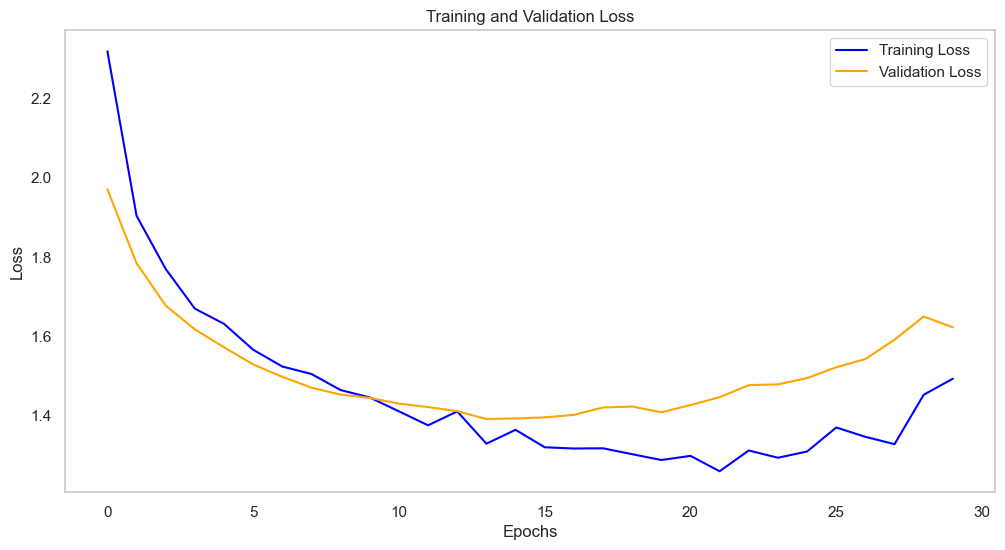

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


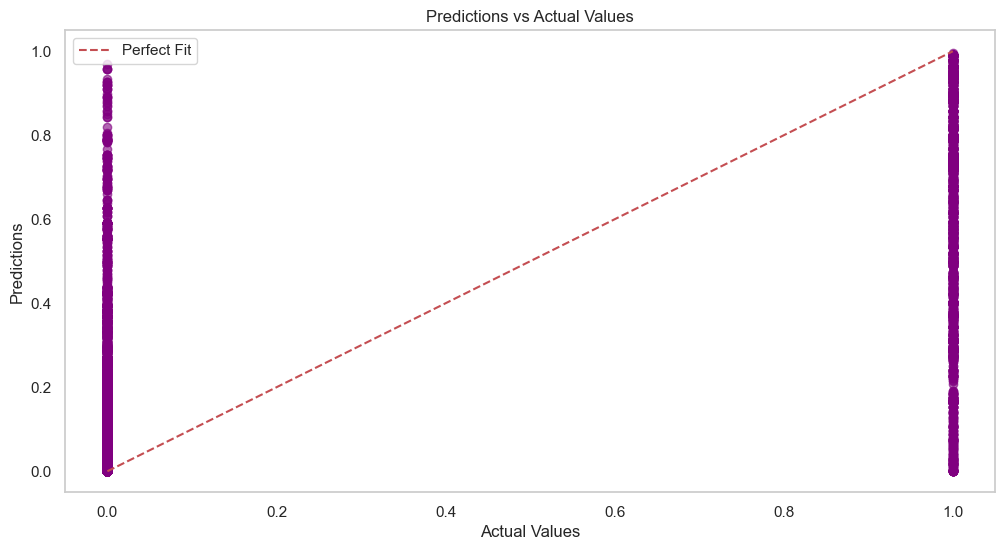

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6757 - loss: 1.0773 
Train Loss: 1.16
Train Accuracy: 0.66
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8151 - loss: 0.5646  
Test Loss: 0.74
Test Accuracy: 0.78


In [105]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Load datasets
train_data = pd.read_csv(r"C:\Users\rafif\Box\CS6350 project\data\train.csv")
test_data = pd.read_csv(r"C:\Users\rafif\Box\CS6350 project\data\test.csv")

print(f"train_data shape: {train_data.shape}")
print(train_data.head())
print(f"test_data shape: {test_data.shape}")
print(test_data.head())

# Columns representing added medications
added_med_columns = [
    "Added_Med_MET", "Added_Med_SUL", "Added_Med_SGLT2", "Added_Med_Insulin",
    "Added_Med_DPP4", "Added_Med_GLP1", "Added_Med_GIP_GLP1", "Added_Med_TZD", "Added_Nothing"
]

# Count occurrences for each column in added_med_columns
class_counts = train_data[added_med_columns].sum(axis=0)
print("Class counts:")
print(class_counts)

# Attributes for features
attributes = [
    "hba1c_last_value", "race_aian", "race_black", "race_hispanic", "race_nhpi",
    "sex_M", "marital_married", "marital_unknown",
    "region_midwest", "region_south", "region_west",
    "diabetes_duration_2023", "Last_Med_MET", "Last_Med_SUL",
    "Last_Med_SGLT2", "Last_Med_Insulin", "Last_Med_AlphaGI", "Last_Med_DPP4",
    "Last_Med_GLP1", "Last_Med_GIP_GLP1", "Last_Med_TZD"
]

# Handle imbalance in dataset
majority_class = train_data[train_data['Added_Nothing'] == 1]
minority_classes = train_data[train_data['Added_Nothing'] == 0]

# Downsample majority class
majority_downsampled = resample(
    majority_class,
    replace=False,
    n_samples=500,  # Adjust to desired sample size
    random_state=42
)

# Upsample minority classes
minority_oversampled = resample(
    minority_classes,
    replace=True,
    n_samples=500,  # Adjust to match majority class size
    random_state=42
)

# Combine and shuffle the balanced dataset
balanced_train_data = pd.concat([majority_downsampled, minority_oversampled])
balanced_train_data = balanced_train_data.sample(frac=1, random_state=42)

# Prepare training features and labels
X_train = balanced_train_data[attributes].values
y_train = balanced_train_data[added_med_columns].values

# Prepare test features and labels
X_test = test_data[attributes].values
y_test = test_data[added_med_columns].values

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(added_med_columns), activation='softmax')  # One neuron per medication class
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate model
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Train Loss: {train_loss:.2f}")
print(f"Train Accuracy: {train_accuracy:.2f}")
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
# Step 6: Visualization
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot predictions vs actual values
predictions = model.predict(X_test).flatten()
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.legend()
plt.grid()
plt.show()

train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Train Loss: {train_loss:.2f}")
print(f"Train Accuracy: {train_accuracy:.2f}")

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import tensorflow as tf

In [22]:
# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step


Confusion Matrix:
[[   6    0    0    0    0    0    0    0   13]
 [   0    0    0    0    0    3    0    0    5]
 [   4    1    1    0    0   10    0    0    7]
 [   5    0    4    1    0    0    0    0   16]
 [   0    0    0    0    0    1    0    0    1]
 [   0    0    0    1    0    1    0    0   17]
 [   2    1    0    0    0    2    0    0    4]
 [   0    0    0    0    0    0    0    0    2]
 [ 105   19   26   46    0  172    0    0 1524]]
Classification Report:
                    precision    recall  f1-score   support

     Added_Med_MET       0.05      0.32      0.09        19
     Added_Med_SUL       0.00      0.00      0.00         8
   Added_Med_SGLT2       0.03      0.04      0.04        23
 Added_Med_Insulin       0.02      0.04      0.03        26
    Added_Med_DPP4       0.00      0.00      0.00         2
    Added_Med_GLP1       0.01      0.05      0.01        19
Added_Med_GIP_GLP1       0.00      0.00      0.00         9
     Added_Med_TZD       0.00      0.00      

C:\Users\rafif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rafif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rafif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

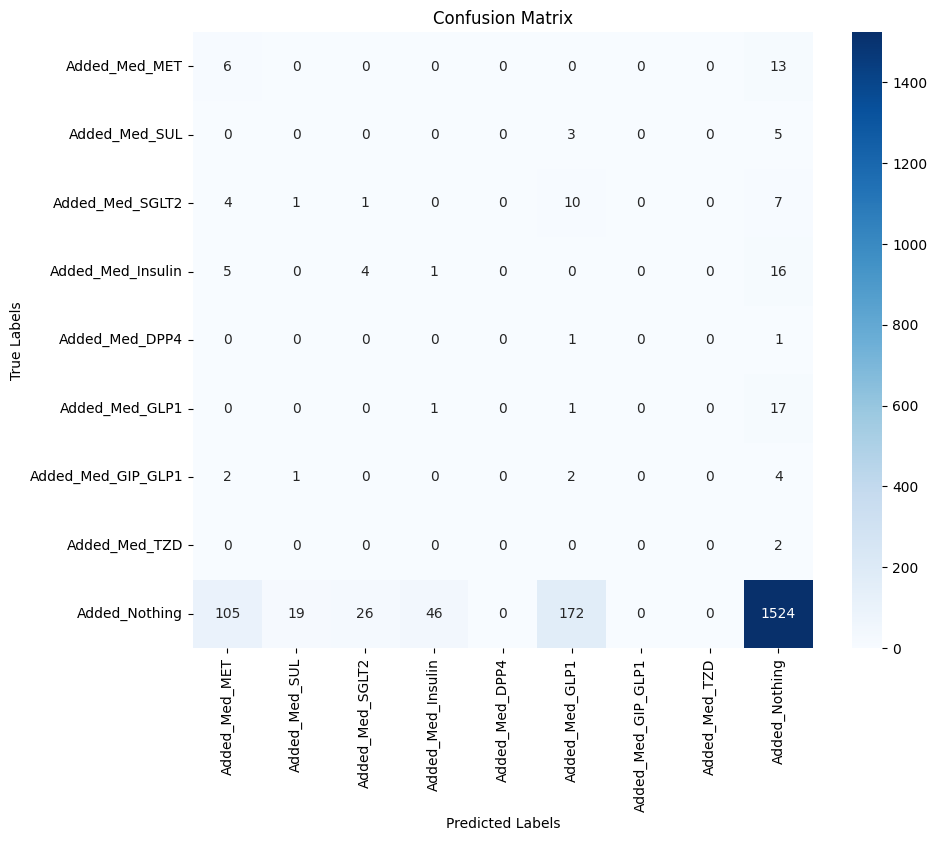

In [23]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_true, y_pred, target_names=added_med_columns)
print("Classification Report:")
print(class_report)

# Visualize confusion matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=added_med_columns, yticklabels=added_med_columns)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [25]:
# Forward and backward pass
with tf.GradientTape() as tape:
    predictions = model(X_batch, training=True)  # Forward pass
    loss = tf.keras.losses.categorical_crossentropy(y_batch, predictions)  # Compute loss

# Compute gradients
gradients = tape.gradient(loss, model.trainable_variables)

# Print gradient information for the first layer
print("Gradient for the first layer weights:")
print(gradients[0])

Gradient for the first layer weights:
tf.Tensor(
[[-1.0085535  -7.2023897   0.33958426 ... -3.0649302  -1.0491127
   0.85058624]
 [ 0.02330122  0.6031664   0.06315763 ...  0.20746419  0.35667983
   0.09626333]
 [ 0.10909909  1.4730319   0.06315368 ...  0.5066619   0.8049785
   0.2341842 ]
 ...
 [-0.10799298  1.7193942   0.18003798 ...  1.6898513   1.801421
   0.08758276]
 [ 0.02146198  0.5555566   0.0581724  ...  0.4540667   1.2210776
   0.08866496]
 [ 0.01256152  0.32516277  0.03404783 ...  0.11184251  0.1922836
   0.05189489]], shape=(21, 128), dtype=float32)


In [28]:
pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   --------- ----------------------------- 61.4/258.3 kB 812.7 kB/s eta 0:00:01
   ---------------------------------------  256.0/258.3 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: C:\Users\rafif\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [29]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.12.4-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train_data = pd.read_csv(r"C:\Users\rafif\Box\CS6350 project\data\train.csv")
test_data = pd.read_csv(r"C:\Users\rafif\Box\CS6350 project\data\test.csv")

# Separate features and labels
X = train_data.drop(columns=['hba1c_next_value'])  # Assuming 'hba1c_next_value' is your target
y = train_data['hba1c_next_value']  # Assuming 'hba1c_next_value' is your target

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert y_encoded to a pandas Series
y_encoded_series = pd.Series(y_encoded)

# Identify classes with fewer than 2 samples
class_counts = y_encoded_series.value_counts()
valid_classes = class_counts[class_counts >= 2].index

# Filter out rows corresponding to valid classes
X_filtered = X[y_encoded_series.isin(valid_classes)]
y_filtered = y_encoded_series[y_encoded_series.isin(valid_classes)]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Handle class imbalance with SMOTE
# Ensure valid value for k_neighbors
min_samples = class_counts.min()
k_neighbors_value = min(max(min_samples - 1, 1), 5)  # Ensure k_neighbors is between 1 and 5
smote = SMOTE(random_state=42, k_neighbors=k_neighbors_value)  # Adjusted n_neighbors to avoid error
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check unique values in the resampled y_train to confirm correct label range
print("Unique labels in y_train_resampled:", np.unique(y_train_resampled))

# Calculate the number of unique classes in y_train_resampled
num_classes = len(np.unique(y_train_resampled))  # Update num_classes based on the resampled data
print("Number of unique classes after SMOTE:", num_classes)

from sklearn.preprocessing import LabelEncoder

# Step 1: Re-encode labels in y_train_resampled and y_test
label_encoder = LabelEncoder()

# Fit the encoder on y_train_resampled and transform both train and test labels
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Get the number of classes after encoding
num_classes = len(np.unique(y_train_resampled_encoded))

# Step 2: Convert the re-encoded labels to categorical
y_train_categorical = to_categorical(y_train_resampled_encoded, num_classes=num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes=num_classes)

# Step 3: Build and train the model
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_dim=X_train_resampled.shape[1]),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the model
history = model.fit(
    X_train_resampled, y_train_categorical,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Step 5: Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(class_report)

# Step 6: Plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(conf_matrix, labels=label_encoder.classes_)

# Plotting training history
def plot_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

from sklearn.metrics import classification_report, confusion_matrix

# Ensure y_pred is also encoded correctly
y_pred_encoded = label_encoder.transform(y_pred)

# Get unique labels in y_test and use them explicitly
y_test_unique_labels = np.unique(y_test_encoded)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report: Use correct labels (y_test_unique_labels)
class_report = classification_report(y_test_encoded, y_pred_encoded, labels=y_test_unique_labels, target_names=label_encoder.classes_)
print("Classification Report:")
print(class_report)

Unique labels in y_train_resampled: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91]
Number of unique classes after SMOTE: 91
Epoch 1/50
986/986 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6103 - loss: 1.4616 - val_accuracy: 0.2369 - val_loss: 2.7363
Epoch 2/50
986/986 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6063 - loss: 1.4653 - val_accuracy: 0.2528 - val_loss: 2.7859
Epoch 3/50
986/986 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6064 - loss: 1.4583 - val_accuracy: 0.2397 - val_loss: 2.8962
Epoch 4/50
986/986 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6045 - loss: 1.4535 - val_accuracy: 0.2906 - val_loss: 2.7689
Epoch 5/50
986/986 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6112 - loss: 1.4371 - val_accuracy: 0.3472 - val_loss: 2.6999
Epoch

ValueError: Number of classes, 90, does not match size of target_names, 91. Try specifying the labels parameter

In [33]:
# Check the columns of the train_data
print(train_data.columns)

# Check the columns of the test_data
print(test_data.columns)


Index(['hba1c_next_value', 'race_white', 'race_aian', 'race_black',
       'race_hispanic', 'race_nhpi', 'sex_M', 'marital_married',
       'marital_single', 'marital_unknown', 'region_midwest',
       'region_northeast', 'region_south', 'region_west', 'hba1c_last_value',
       'diabetes_duration_2023', 'Last_Med_MET', 'Last_Med_SUL',
       'Last_Med_SGLT2', 'Last_Med_Insulin', 'Last_Med_AlphaGI',
       'Last_Med_DPP4', 'Last_Med_GLP1', 'Last_Med_GIP_GLP1', 'Last_Med_TZD',
       'Added_Med_MET', 'Added_Med_SUL', 'Added_Med_SGLT2',
       'Added_Med_Insulin', 'Added_Med_AlphaGI', 'Added_Med_DPP4',
       'Added_Med_GLP1', 'Added_Med_GIP_GLP1', 'Added_Med_TZD',
       'Added_Nothing'],
      dtype='object')
Index(['hba1c_next_value', 'race_white', 'race_aian', 'race_black',
       'race_hispanic', 'race_nhpi', 'sex_M', 'marital_married',
       'marital_single', 'marital_unknown', 'region_midwest',
       'region_northeast', 'region_south', 'region_west', 'hba1c_last_value',
       '

In [35]:
print(y.value_counts())

hba1c_next_value
6.6     541
7.0     499
6.3     464
6.5     445
6.9     425
       ... 
15.7      3
13.1      2
11.7      2
12.0      2
12.3      1
Name: count, Length: 92, dtype: int64


In [38]:
import numpy as np
print(np.bincount(y_encoded))

[ 27   9   3   5  47  50  76 102  91 146 137 267 161 323 291 464 420 445
 541 409 373 425 499 256 309 307 218 121 277 211 253 116 138 155 189 277
 131 114  83 149  77  87  29 115  47  32  25  56  46  39  32  69  10   7
  23  28  33  34  26  27  12  16  63  60  38  76  30  26  11   2  23  15
   2  15  13   1  24  21   3  20   5   2  10   4   6   8   3  14   7   4
   3   6]


In [39]:
X_train,X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# Assuming your features are in X and target labels in y
# Example: X = features, y = target labels

# 1. Encode target labels if not already encoded
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 2. Get class distribution
class_distribution = Counter(y_encoded)
print("Class distribution:", class_distribution)

# 3. Remove classes with fewer than a threshold (e.g., 5 samples)
threshold = 5
classes_to_remove = [class_label for class_label, count in class_distribution.items() if count < threshold]

# 4. Filter out instances of the rare classes
X_filtered = X[~np.isin(y_encoded, classes_to_remove)]
y_filtered = y_encoded[~np.isin(y_encoded, classes_to_remove)]

# 5. Perform the stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered)

# 6. Verify the class distribution in the train and test sets
print("Train class distribution:", Counter(y_train))
print("Test class distribution:", Counter(y_test))

Class distribution: Counter({18: 541, 22: 499, 15: 464, 17: 445, 21: 425, 16: 420, 19: 409, 20: 373, 13: 323, 24: 309, 25: 307, 14: 291, 35: 277, 28: 277, 11: 267, 23: 256, 30: 253, 26: 218, 29: 211, 34: 189, 12: 161, 33: 155, 39: 149, 9: 146, 32: 138, 10: 137, 36: 131, 27: 121, 31: 116, 43: 115, 37: 114, 7: 102, 8: 91, 41: 87, 38: 83, 40: 77, 6: 76, 65: 76, 51: 69, 62: 63, 63: 60, 47: 56, 5: 50, 44: 47, 4: 47, 48: 46, 49: 39, 64: 38, 57: 34, 56: 33, 45: 32, 50: 32, 66: 30, 42: 29, 55: 28, 0: 27, 59: 27, 58: 26, 67: 26, 46: 25, 76: 24, 54: 23, 70: 23, 77: 21, 79: 20, 61: 16, 73: 15, 71: 15, 87: 14, 74: 13, 60: 12, 68: 11, 52: 10, 82: 10, 1: 9, 85: 8, 53: 7, 88: 7, 91: 6, 84: 6, 3: 5, 80: 5, 83: 4, 89: 4, 78: 3, 86: 3, 2: 3, 90: 3, 69: 2, 81: 2, 72: 2, 75: 1})
Train class distribution: Counter({18: 433, 22: 399, 15: 371, 17: 356, 21: 340, 16: 336, 19: 327, 20: 298, 13: 258, 24: 247, 25: 245, 14: 233, 35: 221, 28: 221, 11: 214, 23: 205, 30: 202, 26: 174, 29: 169, 34: 151, 12: 129, 33: 12

In [43]:
print(pd.Series(y_encoded).value_counts())

18    541
22    499
15    464
17    445
21    425
     ... 
90      3
81      2
69      2
72      2
75      1
Name: count, Length: 92, dtype: int64


In [44]:
class_counts = pd.Series(y_encoded).value_counts()
valid_classes = class_counts[class_counts >= 2].index
X_filtered = X[y_encoded.isin(valid_classes)]
y_filtered = y_encoded[y_encoded.isin(valid_classes)]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered)

AttributeError: 'numpy.ndarray' object has no attribute 'isin'

In [45]:
# Split without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [58]:
chunk_size = 10000
chunks = []
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    chunks.append(chunk)
data = pd.concat(chunks, axis=0)

OSError: [Errno 28] No space left on device

In [59]:
import os
os.environ['TMPDIR'] = r"C:\AnotherDirectoryWithSpace"

In [61]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


    data = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError(f"The file at {file_path} was not found. Please check the path.")

# Check the dataset structure
print(data.head())
print(data.info())

# Step 2: Data Preprocessing
# Define the target and features
target_column = 'hba1c_next_value'
if target_column not in data.columns:
    raise ValueError(f"Target column '{target_column}' is not in the dataset.")

X = data.drop(columns=[target_column])
y = data[target_column]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for CNN input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)

# Step 3: Build the CNN Model
def build_cnn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, kernel_size=(2, 2), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(pool_size=(1, 1)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv2D(32, kernel_size=(2, 2), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1)  # Regression output
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Step 4: Train the Model
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
model = build_cnn_model(input_shape)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=16,
    verbose=1
)

# Step 5: Evaluate the Model
evaluation = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {evaluation[0]:.4f}\nTest MAE: {evaluation[1]:.4f}")

# Step 6: Visualization
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Predictions
predictions = model.predict(X_test).flatten()

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.title('Predictions vs Actual Values (CNN)')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.legend()
plt.grid()
plt.show()

# Additional optional visualization: Residuals plot
residuals = y_test - predictions
plt.figure(figsize=(12, 6))
plt.scatter(predictions, residuals, alpha=0.6, color='green')
plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
plt.title('Residuals vs Predictions (CNN)')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()

OSError: [Errno 28] No space left on device

In [64]:
import pandas as pd
import os
import psutil  # To check disk space on all platforms

# Load datasets
train_data = pd.read_csv(r"C:\Users\rafif\Box\CS6350 project\data\train.csv")
test_data = pd.read_csv(r"C:\Users\rafif\Box\CS6350 project\data\test.csv")

# Step 2: Check if file exists
file_path = r"C:\Users\rafif\Box\CS6350 project\data\train.csv"  # Define file path explicitly

if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file at {file_path} was not found. Please check the path.")

# Check available space on the disk
disk_usage = psutil.disk_usage(os.path.dirname(file_path))  # Get disk usage for the directory containing the file
free_space = disk_usage.free / (1024 * 1024)  # Free space in MB
if free_space < 100:  # Check if there is less than 100 MB free space
    raise OSError("Insufficient disk space to load the dataset. Please free up some space.")

# Step 3: Load the dataset (You can also load a smaller subset for testing)
try:
    data = pd.read_csv(file_path, nrows=1000)  # Try loading a smaller subset for testing
except Exception as e:
    print(f"Error loading dataset: {e}")

# Check the structure of the dataset
print(data.head())
print(data.info())



   hba1c_next_value  race_white  race_aian  race_black  race_hispanic  \
0               7.0           0          0           0              0   
1               6.2           0          0           1              0   
2               6.2           0          0           1              0   
3               5.7           1          0           0              0   
4               5.7           1          0           0              0   

   race_nhpi  sex_M  marital_married  marital_single  marital_unknown  ...  \
0          0      0                1               0                0  ...   
1          0      0                0               1                0  ...   
2          0      0                0               1                0  ...   
3          0      0                1               0                0  ...   
4          0      0                1               0                0  ...   

   Added_Med_MET  Added_Med_SUL  Added_Med_SGLT2  Added_Med_Insulin  \
0              0     

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset (already done)
data = pd.read_csv(r"C:\Users\rafif\Box\CS6350 project\data\train.csv")

# Separate features and target variables
X = data.drop(columns=['hba1c_next_value', 'Added_Nothing'])  # Features
y = data['Added_Nothing']  # Target: medication prediction, use appropriate column (e.g., Added_Med_MET)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Build the model
model = Sequential()

# Input layer (with 35 features in the dataset)
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting

# Output layer (binary classification for 'Added_Med_MET', use sigmoid activation for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

C:\Users\rafif\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 128)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9469 - loss: 0.2319 - val_accuracy: 0.9995 - val_loss: 0.0087
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9998 - loss: 0.0058 - val_accuracy: 1.0000 - val_loss: 3.9177e-04
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 9.2787e-05
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9997 - loss: 0.0022 - val_accuracy: 0.9995 - val_loss: 0.0017
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9998 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 2.6094e-05
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 2.7244e-04 - val_accuracy: 1.0000 - val_loss: 1.3428e-05
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.6582e-04 - val_accuracy: 1.0000 - val_loss: 7.3857e-06
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9997 - los

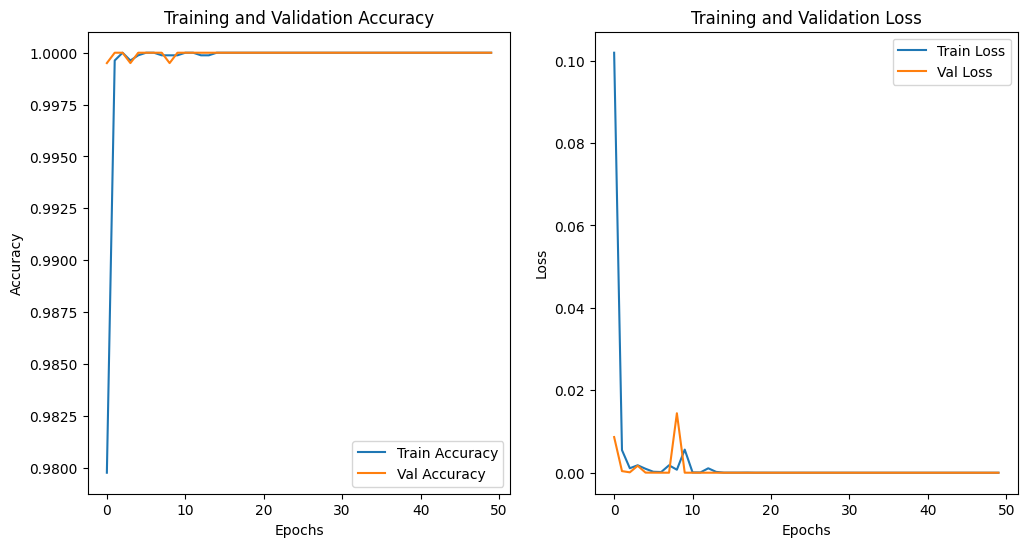

In [68]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [69]:
# Make predictions
predictions = model.predict(X_test_scaled)

# Convert probabilities to binary outcomes (threshold 0.5)
predicted_classes = (predictions > 0.5).astype('int32')

# Create a DataFrame for the predictions alongside actual values
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predicted_classes.flatten()
})

# Display some sample predictions
print(results.head())

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
      Actual  Predicted
6252       1          1
4684       1          1
1731       1          1
4742       1          1
4521       1          1


In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical analysis
from scipy.stats import ttest_ind

# Set a style for the plots
sns.set(style="whitegrid")

In [71]:
# Generate synthetic data for Real and Sur datasets (replace this with your actual data)
np.random.seed(42)
real_data_all = np.random.normal(loc=0.68, scale=0.23, size=5000)  # Real data for all samples
sur_data_all = np.random.normal(loc=0.33, scale=0.22, size=5000)   # Surrogate data for all samples

real_data_test = np.random.normal(loc=0.65, scale=0.29, size=2000)  # Real data for test samples
sur_data_test = np.random.normal(loc=0.23, scale=0.34, size=2000)   # Surrogate data for test samples

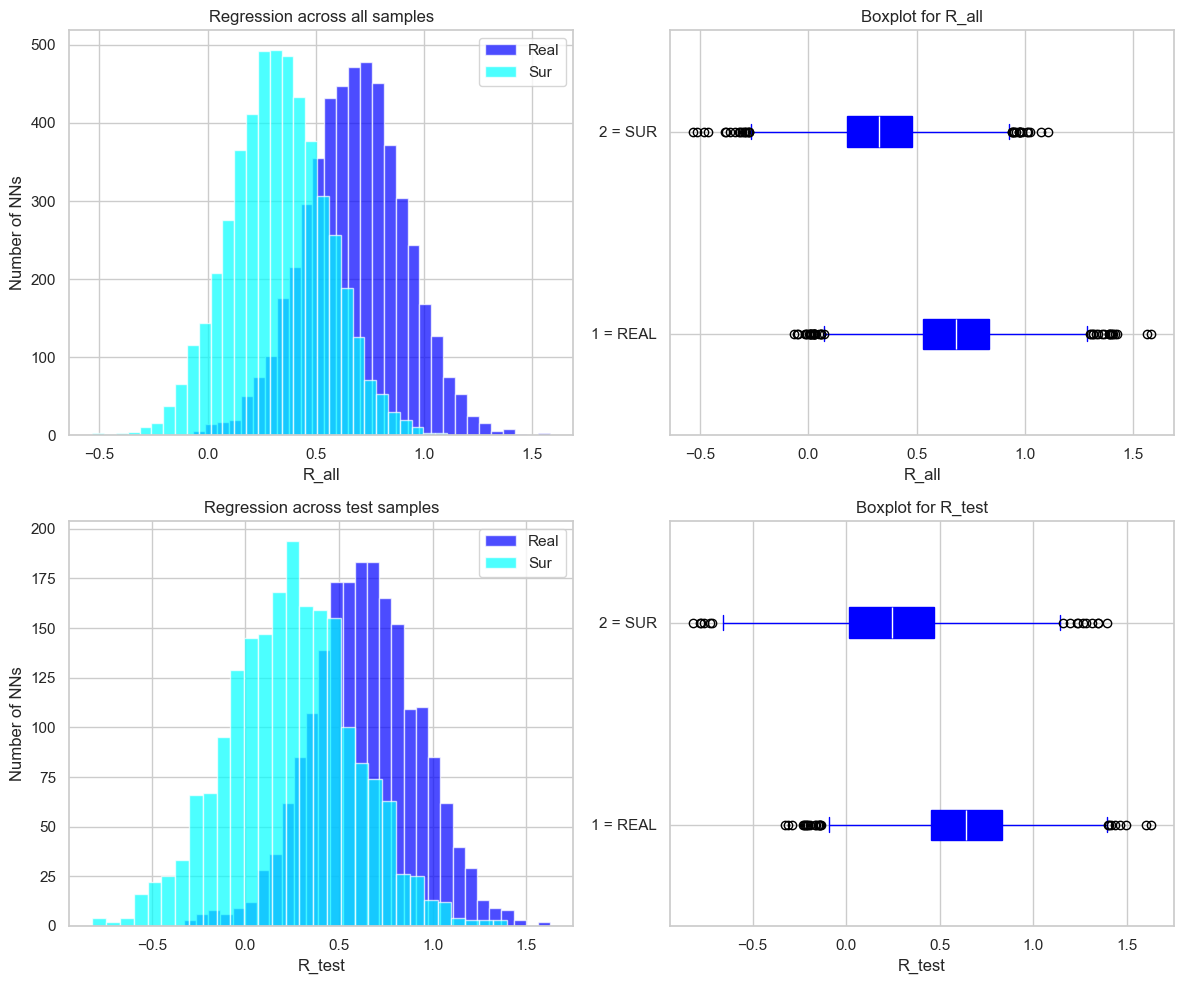

In [73]:
# Create the figure
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# (a) Regression across all samples (Histogram for Real vs Sur)
axs[0, 0].hist(real_data_all, bins=30, alpha=0.7, label='Real', color='blue')
axs[0, 0].hist(sur_data_all, bins=30, alpha=0.7, label='Sur', color='cyan')
axs[0, 0].set_title('Regression across all samples')
axs[0, 0].set_xlabel('R_all')
axs[0, 0].set_ylabel('Number of NNs')
axs[0, 0].legend(loc='upper right')

# (b) Boxplot for R_all
axs[0, 1].boxplot([real_data_all, sur_data_all], vert=False, patch_artist=True, 
                  boxprops=dict(facecolor='blue', color='blue'), 
                  whiskerprops=dict(color='blue'), 
                  capprops=dict(color='blue'), 
                  medianprops=dict(color='white'))
axs[0, 1].set_title('Boxplot for R_all')
axs[0, 1].set_yticklabels(['1 = REAL', '2 = SUR'])
axs[0, 1].set_xlabel('R_all')

# (c) Regression across test samples (Histogram for Real vs Sur in test set)
axs[1, 0].hist(real_data_test, bins=30, alpha=0.7, label='Real', color='blue')
axs[1, 0].hist(sur_data_test, bins=30, alpha=0.7, label='Sur', color='cyan')
axs[1, 0].set_title('Regression across test samples')
axs[1, 0].set_xlabel('R_test')
axs[1, 0].set_ylabel('Number of NNs')
axs[1, 0].legend(loc='upper right')

# (d) Boxplot for R_test
axs[1, 1].boxplot([real_data_test, sur_data_test], vert=False, patch_artist=True, 
                  boxprops=dict(facecolor='blue', color='blue'), 
                  whiskerprops=dict(color='blue'), 
                  capprops=dict(color='blue'), 
                  medianprops=dict(color='white'))
axs[1, 1].set_title('Boxplot for R_test')
axs[1, 1].set_yticklabels(['1 = REAL', '2 = SUR'])
axs[1, 1].set_xlabel('R_test')

# Adjust layout
plt.tight_layout()
plt.show()

In [74]:
# Perform T-test on both datasets (all samples and test samples)
t_stat_all, p_val_all = ttest_ind(real_data_all, sur_data_all)
t_stat_test, p_val_test = ttest_ind(real_data_test, sur_data_test)

# Print the T-test results
print(f"All samples - T-statistic: {t_stat_all:.2f}, P-value: {p_val_all:.2f}")
print(f"Test samples - T-statistic: {t_stat_test:.2f}, P-value: {p_val_test:.2f}")

All samples - T-statistic: 78.28, P-value: 0.00
Test samples - T-statistic: 40.18, P-value: 0.00


In [76]:
# Generate synthetic data for training, validation, test, and all datasets
np.random.seed(42)
target_train = np.random.normal(40, 10, 100)
predicted_train = target_train + np.random.normal(0, 5, 100)
target_val = np.random.normal(40, 10, 50)
predicted_val = target_val + np.random.normal(0, 5, 50)

target_test = np.random.normal(40, 10, 30)
predicted_test = target_test + np.random.normal(0, 5, 30)

target_all = np.concatenate([target_train, target_val, target_test])
predicted_all = np.concatenate([predicted_train, predicted_val, predicted_test])

In [77]:
# Calculate R values (correlation coefficients)
R_train = np.corrcoef(target_train, predicted_train)[0, 1]
R_val = np.corrcoef(target_val, predicted_val)[0, 1]
R_test = np.corrcoef(target_test, predicted_test)[0, 1]
R_all = np.corrcoef(target_all, predicted_all)[0, 1]

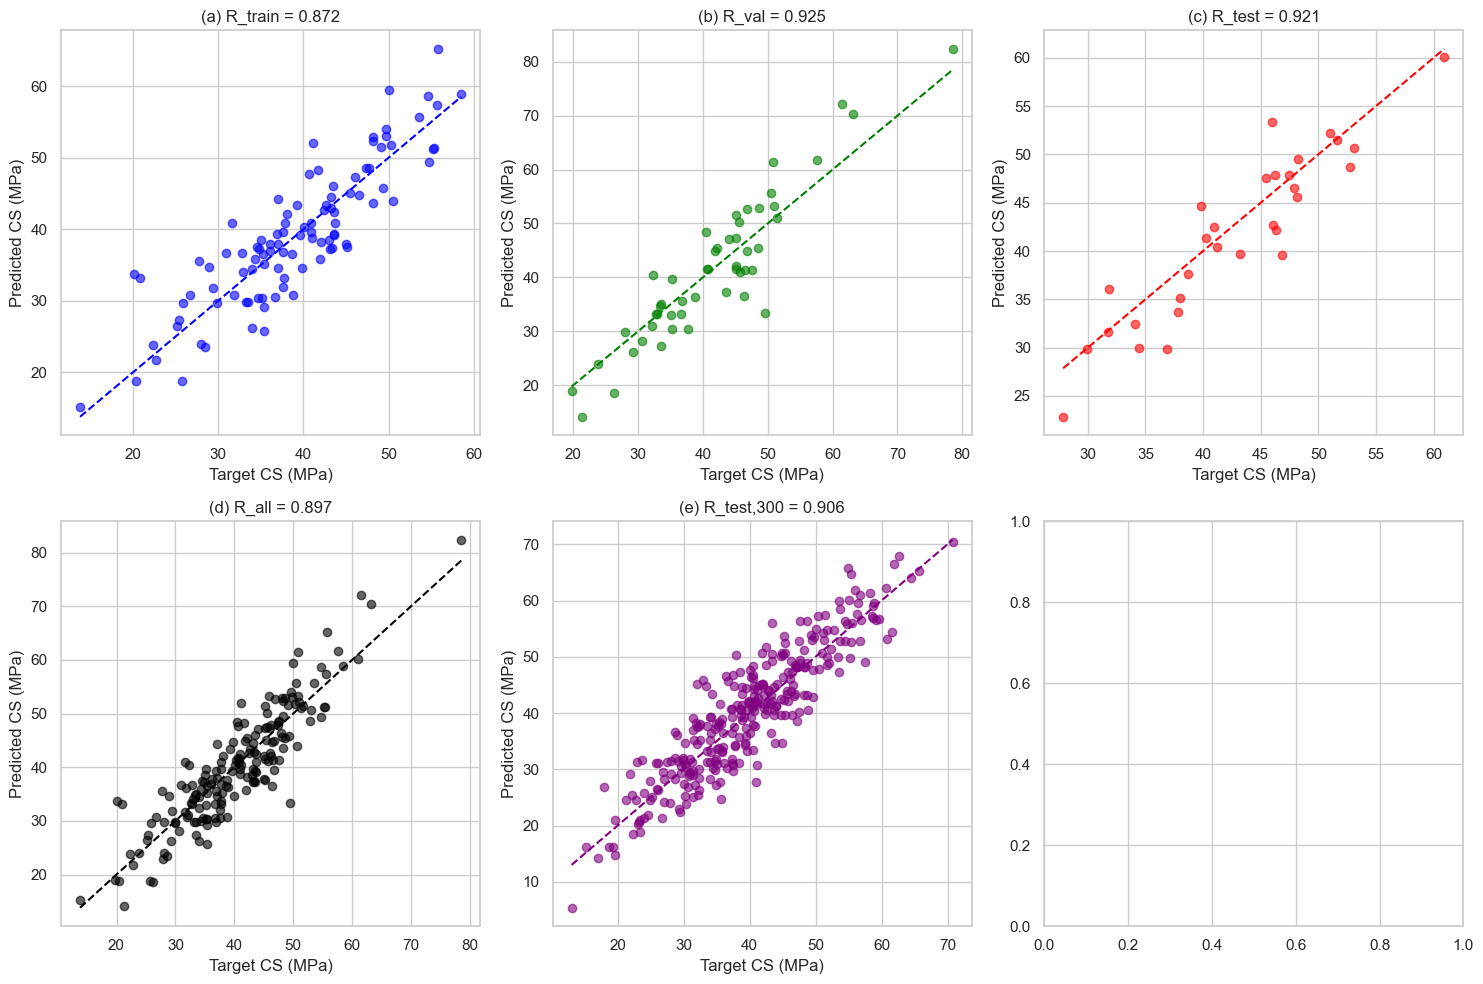

In [78]:
# Create the figure
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# (a) Scatter plot for R_train
axs[0, 0].scatter(target_train, predicted_train, color='blue', alpha=0.6)
axs[0, 0].plot([min(target_train), max(target_train)], [min(target_train), max(target_train)], color='blue', linestyle='--')
axs[0, 0].set_title(f'(a) R_train = {R_train:.3f}')
axs[0, 0].set_xlabel('Target CS (MPa)')
axs[0, 0].set_ylabel('Predicted CS (MPa)')

# (b) Scatter plot for R_val
axs[0, 1].scatter(target_val, predicted_val, color='green', alpha=0.6)
axs[0, 1].plot([min(target_val), max(target_val)], [min(target_val), max(target_val)], color='green', linestyle='--')
axs[0, 1].set_title(f'(b) R_val = {R_val:.3f}')
axs[0, 1].set_xlabel('Target CS (MPa)')
axs[0, 1].set_ylabel('Predicted CS (MPa)')

# (c) Scatter plot for R_test
axs[0, 2].scatter(target_test, predicted_test, color='red', alpha=0.6)
axs[0, 2].plot([min(target_test), max(target_test)], [min(target_test), max(target_test)], color='red', linestyle='--')
axs[0, 2].set_title(f'(c) R_test = {R_test:.3f}')
axs[0, 2].set_xlabel('Target CS (MPa)')
axs[0, 2].set_ylabel('Predicted CS (MPa)')

# (d) Scatter plot for R_all
axs[1, 0].scatter(target_all, predicted_all, color='black', alpha=0.6)
axs[1, 0].plot([min(target_all), max(target_all)], [min(target_all), max(target_all)], color='black', linestyle='--')
axs[1, 0].set_title(f'(d) R_all = {R_all:.3f}')
axs[1, 0].set_xlabel('Target CS (MPa)')
axs[1, 0].set_ylabel('Predicted CS (MPa)')

# (e) Scatter plot for a larger test sample (if available)
# Generate synthetic data for a large test sample for the demonstration
target_test_300 = np.random.normal(40, 10, 300)
predicted_test_300 = target_test_300 + np.random.normal(0, 5, 300)

R_test_300 = np.corrcoef(target_test_300, predicted_test_300)[0, 1]
axs[1, 1].scatter(target_test_300, predicted_test_300, color='purple', alpha=0.6)
axs[1, 1].plot([min(target_test_300), max(target_test_300)], [min(target_test_300), max(target_test_300)], color='purple', linestyle='--')
axs[1, 1].set_title(f'(e) R_test,300 = {R_test_300:.3f}')
axs[1, 1].set_xlabel('Target CS (MPa)')
axs[1, 1].set_ylabel('Predicted CS (MPa)')

# Adjust layout
plt.tight_layout()
plt.show()

In [79]:
from sklearn.metrics import mean_squared_error

In [80]:
# Calculate MSE for each dataset
mse_train = mean_squared_error(target_train, predicted_train)
mse_val = mean_squared_error(target_val, predicted_val)
mse_test = mean_squared_error(target_test, predicted_test)
mse_all = mean_squared_error(target_all, predicted_all)

# Print the MSE values
print(f'MSE (Train): {mse_train:.3f}')
print(f'MSE (Validation): {mse_val:.3f}')
print(f'MSE (Test): {mse_test:.3f}')
print(f'MSE (All): {mse_all:.3f}')

MSE (Train): 22.522
MSE (Validation): 28.624
MSE (Test): 11.996
MSE (All): 22.463


NameError: name 'mse_test_300' is not defined

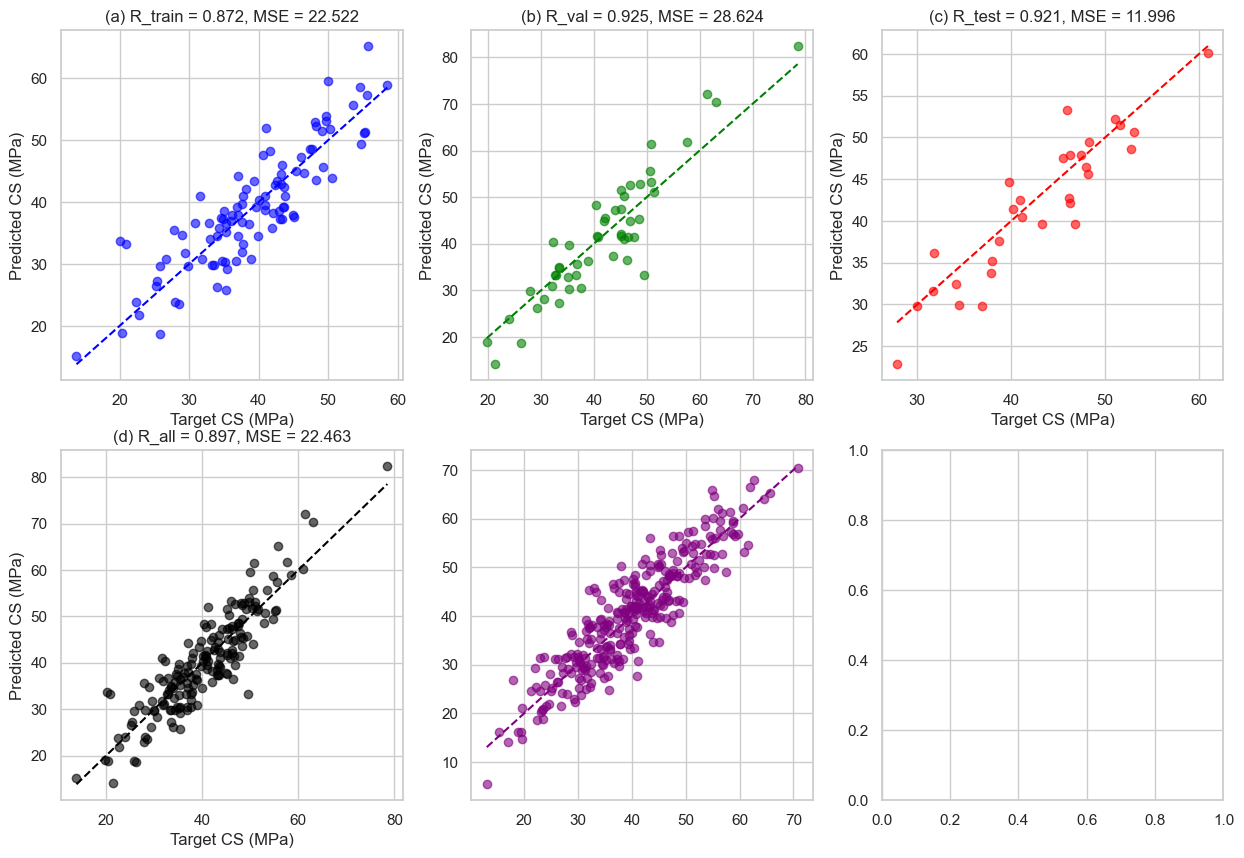

In [81]:
# Create the figure
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# (a) Scatter plot for R_train and MSE
axs[0, 0].scatter(target_train, predicted_train, color='blue', alpha=0.6)
axs[0, 0].plot([min(target_train), max(target_train)], [min(target_train), max(target_train)], color='blue', linestyle='--')
axs[0, 0].set_title(f'(a) R_train = {R_train:.3f}, MSE = {mse_train:.3f}')
axs[0, 0].set_xlabel('Target CS (MPa)')
axs[0, 0].set_ylabel('Predicted CS (MPa)')

# (b) Scatter plot for R_val and MSE
axs[0, 1].scatter(target_val, predicted_val, color='green', alpha=0.6)
axs[0, 1].plot([min(target_val), max(target_val)], [min(target_val), max(target_val)], color='green', linestyle='--')
axs[0, 1].set_title(f'(b) R_val = {R_val:.3f}, MSE = {mse_val:.3f}')
axs[0, 1].set_xlabel('Target CS (MPa)')
axs[0, 1].set_ylabel('Predicted CS (MPa)')

# (c) Scatter plot for R_test and MSE
axs[0, 2].scatter(target_test, predicted_test, color='red', alpha=0.6)
axs[0, 2].plot([min(target_test), max(target_test)], [min(target_test), max(target_test)], color='red', linestyle='--')
axs[0, 2].set_title(f'(c) R_test = {R_test:.3f}, MSE = {mse_test:.3f}')
axs[0, 2].set_xlabel('Target CS (MPa)')
axs[0, 2].set_ylabel('Predicted CS (MPa)')

# (d) Scatter plot for R_all and MSE
axs[1, 0].scatter(target_all, predicted_all, color='black', alpha=0.6)
axs[1, 0].plot([min(target_all), max(target_all)], [min(target_all), max(target_all)], color='black', linestyle='--')
axs[1, 0].set_title(f'(d) R_all = {R_all:.3f}, MSE = {mse_all:.3f}')
axs[1, 0].set_xlabel('Target CS (MPa)')
axs[1, 0].set_ylabel('Predicted CS (MPa)')

# (e) Scatter plot for R_test_300 and MSE (if using the larger test sample)
axs[1, 1].scatter(target_test_300, predicted_test_300, color='purple', alpha=0.6)
axs[1, 1].plot([min(target_test_300), max(target_test_300)], [min(target_test_300), max(target_test_300)], color='purple', linestyle='--')
axs[1, 1].set_title(f'(e) R_test,300 = {R_test_300:.3f}, MSE = {mse_test_300:.3f}')
axs[1, 1].set_xlabel('Target CS (MPa)')
axs[1, 1].set_ylabel('Predicted CS (MPa)')

# Adjust layout
plt.tight_layout()
plt.show()

Epoch 1/30


C:\Users\rafif\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2935 - loss: 2.1966 - val_accuracy: 0.5050 - val_loss: 1.8523
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4729 - loss: 1.9584 - val_accuracy: 0.5200 - val_loss: 1.7578
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5217 - loss: 1.6819 - val_accuracy: 0.5450 - val_loss: 1.6824
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5250 - loss: 1.6124 - val_accuracy: 0.5550 - val_loss: 1.6258
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5627 - loss: 1.5560 - val_accuracy: 0.5600 - val_loss: 1.5849
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5894 - loss: 1.4776 - val_accuracy: 0.5750 - val_loss: 1.5382
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5517 - loss: 1.4867 - val_accuracy: 0.5750 - val_loss: 1.5043
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5874 - loss: 1.4938 - val_accuracy: 0.5700 - val_loss: 1.4936
Epo

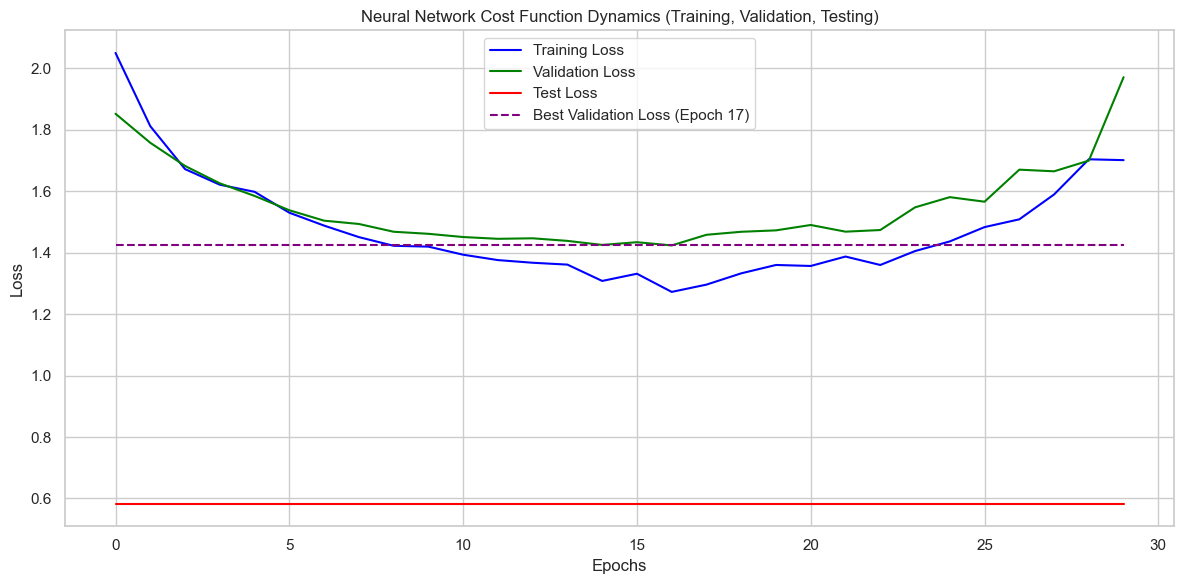

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Load datasets
train_data = pd.read_csv(r"C:\Users\rafif\Box\CS6350 project\data\train.csv")
test_data = pd.read_csv(r"C:\Users\rafif\Box\CS6350 project\data\test.csv")

# Columns representing added medications
added_med_columns = [
    "Added_Med_MET", "Added_Med_SUL", "Added_Med_SGLT2", "Added_Med_Insulin",
    "Added_Med_DPP4", "Added_Med_GLP1", "Added_Med_GIP_GLP1", "Added_Med_TZD", "Added_Nothing"
]

# Attributes for features
attributes = [
    "hba1c_last_value", "race_aian", "race_black", "race_hispanic", "race_nhpi",
    "sex_M", "marital_married", "marital_unknown",
    "region_midwest", "region_south", "region_west",
    "diabetes_duration_2023", "Last_Med_MET", "Last_Med_SUL",
    "Last_Med_SGLT2", "Last_Med_Insulin", "Last_Med_AlphaGI", "Last_Med_DPP4",
    "Last_Med_GLP1", "Last_Med_GIP_GLP1", "Last_Med_TZD"
]

# Handle imbalance in dataset
majority_class = train_data[train_data['Added_Nothing'] == 1]
minority_classes = train_data[train_data['Added_Nothing'] == 0]

# Downsample majority class
majority_downsampled = resample(
    majority_class,
    replace=False,
    n_samples=500,  # Adjust to desired sample size
    random_state=42
)

# Upsample minority classes
minority_oversampled = resample(
    minority_classes,
    replace=True,
    n_samples=500,  # Adjust to match majority class size
    random_state=42
)

# Combine and shuffle the balanced dataset
balanced_train_data = pd.concat([majority_downsampled, minority_oversampled])
balanced_train_data = balanced_train_data.sample(frac=1, random_state=42)

# Prepare training features and labels
X_train = balanced_train_data[attributes].values
y_train = balanced_train_data[added_med_columns].values

# Prepare test features and labels
X_test = test_data[attributes].values
y_test = test_data[added_med_columns].values

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(added_med_columns), activation='softmax')  # One neuron per medication class
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate model
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Train Loss: {train_loss:.2f}")
print(f"Train Accuracy: {train_accuracy:.2f}")
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Step 6: Visualization - Plot training, validation, and testing loss in one graph
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')

# Use the test set to calculate loss for each epoch
test_losses = [model.evaluate(X_test, y_test, verbose=0)[0]] * 30  # Same test loss for all epochs

plt.plot(test_losses, label='Test Loss', color='red')

# Highlight the best model (validation loss minimum) with a curve-like representation
best_epoch = np.argmin(history.history['val_loss'])  # Find the epoch with the minimum validation loss
best_val_loss = min(history.history['val_loss'])

# Plot best validation loss as part of the curve
best_val_loss_curve = [best_val_loss] * 30  # Create a constant array for best validation loss
plt.plot(best_val_loss_curve, label=f"Best Validation Loss (Epoch {best_epoch+1})", color='purple', linestyle='--')

# Labels and title
plt.title('Neural Network Cost Function Dynamics (Training, Validation, Testing)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [98]:
## Predictive Features

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "train.csv"
df = pd.read_csv(file_path)

# Drop the 'Unnamed: 0' column
df = df.drop(columns=["Unnamed: 0"])

# Features and target variable
X = df.drop(columns=["hba1c_next_value"])
y = df["hba1c_next_value"]

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Model 2: Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test_scaled)
gb_predictions = gb_model.predict(X_test_scaled)

# Model Evaluation
def evaluate_model(predictions, y_test):
    mse = mean_squared_error(y_test, predictions)
    rmse = mse**0.5
    r2 = r2_score(y_test, predictions)
    print(f"RMSE: {rmse}")
    print(f"R^2 Score: {r2}")

print("Random Forest Model Evaluation:")
evaluate_model(rf_predictions, y_test)

print("\nGradient Boosting Model Evaluation:")
evaluate_model(gb_predictions, y_test)

Random Forest Model Evaluation:
RMSE: 0.6161658326565456
R^2 Score: 0.8380787584409427

Gradient Boosting Model Evaluation:
RMSE: 0.5209097766775324
R^2 Score: 0.8842732871013326


In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "train.csv"
df = pd.read_csv(file_path)

# Drop the 'Unnamed: 0' column
df = df.drop(columns=["Unnamed: 0"])

# Features and target variable (now predicting 'hba1c_last_value')
X = df.drop(columns=["hba1c_last_value"])  # Use all other columns as features
y = df["hba1c_last_value"]  # Target is 'hba1c_last_value'

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Model 2: Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test_scaled)
gb_predictions = gb_model.predict(X_test_scaled)

# Model Evaluation
def evaluate_model(predictions, y_test):
    mse = mean_squared_error(y_test, predictions)
    rmse = mse**0.5
    r2 = r2_score(y_test, predictions)
    print(f"RMSE: {rmse}")
    print(f"R^2 Score: {r2}")

print("Random Forest Model Evaluation:")
evaluate_model(rf_predictions, y_test)

print("\nGradient Boosting Model Evaluation:")
evaluate_model(gb_predictions, y_test)

Random Forest Model Evaluation:
RMSE: 0.3409059009951789
R^2 Score: 0.933368275203057

Gradient Boosting Model Evaluation:
RMSE: 0.04283171363280485
R^2 Score: 0.9989481763825766


In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "train.csv"
df = pd.read_csv(file_path)

# Drop the 'Unnamed: 0' column
df = df.drop(columns=["Unnamed: 0"])

# Select only demographic features (race/ethnicity, sex, and marital status)
X_demographic = df[[
    'race_white', 'race_aian', 'race_black', 'race_hispanic', 'race_nhpi', 
    'sex_M', 'marital_married', 'marital_single', 'marital_unknown'
]]

# Target variable
y = df["hba1c_last_value"]  # Predicting 'hba1c_last_value'

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_demographic, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Model 2: Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test_scaled)
gb_predictions = gb_model.predict(X_test_scaled)

# Model Evaluation
def evaluate_model(predictions, y_test):
    mse = mean_squared_error(y_test, predictions)
    rmse = mse**0.5
    r2 = r2_score(y_test, predictions)
    print(f"RMSE: {rmse}")
    print(f"R^2 Score: {r2}")

print("Random Forest Model Evaluation:")
evaluate_model(rf_predictions, y_test)

print("\nGradient Boosting Model Evaluation:")
evaluate_model(gb_predictions, y_test)

Random Forest Model Evaluation:
RMSE: 0.670954550114491
R^2 Score: 0.7418939273849944

Gradient Boosting Model Evaluation:
RMSE: 0.5978960866687228
R^2 Score: 0.7950426772362506


In [93]:
# Selecting only the geographical features (region variables)
X_geographical = df[['region_midwest', 'region_south', 'region_west']]
y_geographical = df['hba1c_next_value']

# Split the data into training and testing sets (80-20 split)
X_train_geo, X_test_geo, y_train_geo, y_test_geo = train_test_split(X_geographical, y_geographical, test_size=0.2, random_state=42)

# Standardize the features
X_train_geo_scaled = scaler.fit_transform(X_train_geo)
X_test_geo_scaled = scaler.transform(X_test_geo)

# Model 1: Random Forest Regressor for geographical features
rf_geo_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_geo_model.fit(X_train_geo_scaled, y_train_geo)

# Model 2: Gradient Boosting Regressor for geographical features
gb_geo_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_geo_model.fit(X_train_geo_scaled, y_train_geo)

# Predictions for geographical features
rf_geo_predictions = rf_geo_model.predict(X_test_geo_scaled)
gb_geo_predictions = gb_geo_model.predict(X_test_geo_scaled)

# Model Evaluation for geographical features
print("Random Forest Model Evaluation (Geographical Info):")
evaluate_model(rf_geo_predictions, y_test_geo)

print("\nGradient Boosting Model Evaluation (Geographical Info):")
evaluate_model(gb_geo_predictions, y_test_geo)

Random Forest Model Evaluation (Geographical Info):
RMSE: 1.6431668819666045
R^2 Score: -0.1515212234534622

Gradient Boosting Model Evaluation (Geographical Info):
RMSE: 1.6338483834843047
R^2 Score: -0.13849756483490028


In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select only geographical features for model
geographical_features = ["region_midwest", "region_south", "region_west"]
X_geographical = df[geographical_features]
y_geographical = df["hba1c_next_value"]

# Split the data into training and testing sets (80-20 split)
X_train_geographical, X_test_geographical, y_train_geographical, y_test_geographical = train_test_split(X_geographical, y_geographical, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_geographical_scaled = scaler.fit_transform(X_train_geographical)
X_test_geographical_scaled = scaler.transform(X_test_geographical)

# Model: Linear Regression for geographical data
lr_model = LinearRegression()
lr_model.fit(X_train_geographical_scaled, y_train_geographical)

# Predictions for linear regression model
lr_predictions = lr_model.predict(X_test_geographical_scaled)

# Model Evaluation function
def evaluate_model(predictions, y_test):
    mse = mean_squared_error(y_test, predictions)
    rmse = mse**0.5
    r2 = r2_score(y_test, predictions)
    print(f"RMSE: {rmse}")
    print(f"R^2 Score: {r2}")

# Evaluate the Linear Regression model
print("Linear Regression Model Evaluation (Geographical Info):")
evaluate_model(lr_predictions, y_test_geographical)

Linear Regression Model Evaluation (Geographical Info):
RMSE: 1.6338483834843047
R^2 Score: -0.13849756483490028


In [94]:
# Selecting clinical data and medications
X_clinical_medications = df[['diabetes_duration_2023', 'Last_Med_MET', 'Last_Med_SUL', 
                              'Last_Med_SGLT2', 'Last_Med_Insulin', 'Last_Med_AlphaGI',
                              'Last_Med_DPP4', 'Last_Med_GLP1', 'Last_Med_GIP_GLP1', 'Last_Med_TZD']]

y_clinical_medications = df['hba1c_next_value']

# Split the data into training and testing sets (80-20 split)
X_train_clinical, X_test_clinical, y_train_clinical, y_test_clinical = train_test_split(X_clinical_medications, 
                                                                                       y_clinical_medications, 
                                                                                       test_size=0.2, 
                                                                                       random_state=42)

# Standardize the features
X_train_clinical_scaled = scaler.fit_transform(X_train_clinical)
X_test_clinical_scaled = scaler.transform(X_test_clinical)

# Model 1: Random Forest Regressor for clinical data and medications
rf_clinical_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_clinical_model.fit(X_train_clinical_scaled, y_train_clinical)

# Model 2: Gradient Boosting Regressor for clinical data and medications
gb_clinical_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_clinical_model.fit(X_train_clinical_scaled, y_train_clinical)

# Predictions for clinical data and medications
rf_clinical_predictions = rf_clinical_model.predict(X_test_clinical_scaled)
gb_clinical_predictions = gb_clinical_model.predict(X_test_clinical_scaled)

# Model Evaluation for clinical data and medications
print("Random Forest Model Evaluation (Clinical Data & Medications):")
evaluate_model(rf_clinical_predictions, y_test_clinical)

print("\nGradient Boosting Model Evaluation (Clinical Data & Medications):")
evaluate_model(gb_clinical_predictions, y_test_clinical)

Random Forest Model Evaluation (Clinical Data & Medications):
RMSE: 0.6588803546035449
R^2 Score: 0.814850852025

Gradient Boosting Model Evaluation (Clinical Data & Medications):
RMSE: 0.6780938167576408
R^2 Score: 0.803895224787371
